In [2]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('강서_따릉이0102.csv')

# 날짜 파싱 및 인덱스 설정
df['기준_날짜'] = pd.to_datetime(df['기준_날짜'])
df = df.set_index('기준_날짜')

# 일별 대여량 집계
daily_rentals = df.resample('D').sum()

# 결측치 처리
daily_rentals.fillna(method='ffill', inplace=True)



C:\Users\evol0\AppData\Local\Temp\ipykernel_25436\1608214472.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rentals.fillna(method='ffill', inplace=True)


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\L

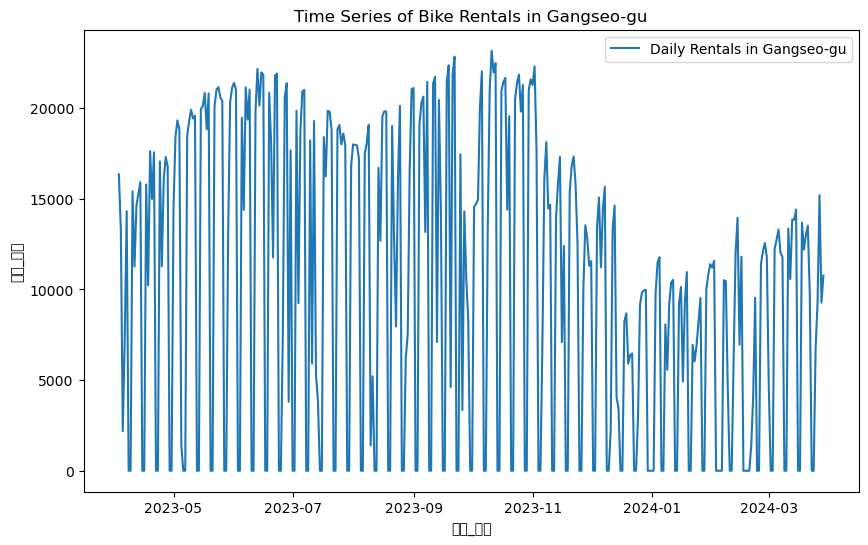

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(daily_rentals['전체_건수'], label='Daily Rentals in Gangseo-gu')
plt.title('Time Series of Bike Rentals in Gangseo-gu')
plt.xlabel('기준_날짜')
plt.ylabel('전체_건수')
plt.legend()
plt.show()


In [7]:
from pmdarima import auto_arima

model = auto_arima(daily_rentals['전체_건수'], seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=7155.367, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=7615.539, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=7306.797, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7613.541, Time=0.20 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=7310.142, Time=0.72 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=7155.813, Time=1.19 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=7155.856, Time=1.22 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=7177.756, Time=0.79 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=7214.095, Time=0.74 s

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\L

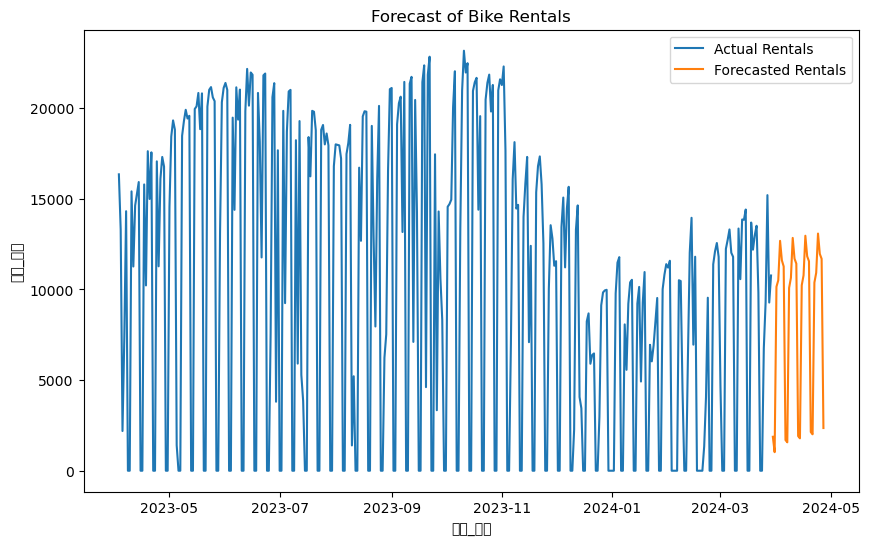

In [8]:
# 예측할 기간 설정, 예를 들어 30일
forecast = model.predict(n_periods=30)
forecast = pd.DataFrame(forecast, index=pd.date_range(start=daily_rentals.index[-1], periods=30, freq='D'), columns=['Prediction'])

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(daily_rentals['전체_건수'], label='Actual Rentals')
plt.plot(forecast['Prediction'], label='Forecasted Rentals')
plt.title('Forecast of Bike Rentals')
plt.xlabel('기준_날짜')
plt.ylabel('전체_건수')
plt.legend()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')


In [3]:
# 데이터 불러오기
bikedata = pd.read_csv('강서_따릉이0102.csv')
weatherdata = pd.read_csv('기온강수량미세먼지2.csv', encoding='cp949')

# 날짜 데이터 타입 변환
bikedata['기준_날짜'] = pd.to_datetime(bikedata['기준_날짜'])
weatherdata['기준_날짜'] = pd.to_datetime(weatherdata['기준_날짜'])

# 날짜를 인덱스로 설정
bikedata.set_index('기준_날짜', inplace=True)
weatherdata.set_index('기준_날짜', inplace=True)

# 데이터 병합
data = bikedata.join(weatherdata, how='inner')


In [5]:
result = adfuller(data['전체_건수'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# p-value가 0.05보다 크면 비정상 시계열이므로 차분 필요
if result[1] > 0.05:
    data['rental_count_diff'] = data['전체_건수'].diff().dropna()


MemoryError: Unable to allocate 4.35 GiB for an array with shape (3514513, 166) and data type float64

In [ ]:
# 차분된 데이터의 ACF 및 PACF 플롯을 그려 최적의 p, q 결정
plot_acf(data['rental_count_diff'].dropna())
plot_pacf(data['rental_count_diff'].dropna())
plt.show()


In [ ]:
# p, d, q 값은 ACF, PACF 플롯과 정상성 검사를 통해 결정
model = ARIMA(data['전체_건수'], order=(1,1,1))
model_fit = model.fit()


In [ ]:
print(model_fit.summary())

# 미래 값 예측
forecast = model_fit.forecast(steps=5)
print(forecast)
